In [4]:
%run ../processing/read_data.py

In [14]:
import os
import numpy as np
import pandas as pd

import pymc3 as pm
import theano.tensor as tt


import matplotlib.pyplot as plt
import matplotlib.cm as cmap
%matplotlib inline

In [111]:
from bokeh.palettes import brewer
from bokeh.plotting import figure, show

In [ ]:
def cleaning_df(df, method, clean_neg = False, percentage = 0.5):
    if clean_neg: #verifies if the value is negative and if it is under the error margin, if it is, turn to zero
        df[(df[:, 1] < 0) & (df[:, 1] > -df[:, 2]) , 1] = 0
        df = df[(df[:, 1] > 0)] #otherwise just cut off
    if method == 'std_dev': #cuts the points with error over the mean error + 1 std
        threshold = df.mean(axis = 0)[2] + df.std(axis = 0)[2]
        df_filter = df[(threshold>df[:,2])]
    elif method == 'percentage':
        threshold = df.max(axis = 0)[1] * percentage
        df_filter = df[(threshold>df[:,2])]
    else:
        df_filter = df
    return df_filter

In [5]:
def get_wavelets(sn, keys, wavelet = 'sym2', mlev = 2):
    wav = wt.Wavelet(wavelet)
    
    fmin, xstar, mu, stds = gaussian_process(sn, keys)
    for filt in keys: 
        coeffs = [np.array(wt.swt(mu[filt], wav, level=mlev)).flatten()]

    return np.concatenate(coeffs)

In [6]:
def gaussian_process(data, filters):
    x = np.linspace(data.MJD.min(), data.MJD.max(), 100)
    data_dict = {band: df[['MJD', 'FLUXCAL', 'FLUXCALERR']].values for band, df in data.groupby('FLT')}
    
    
    mus = {filters[0] : [], filters[1] : [], filters[2] : [], filters[3] : []}
    stds = {filters[0] : [], filters[1] : [], filters[2] : [], filters[3] : []}

    for band, dat in data_dict.items():
        gp = gg.GP((500**2)*kr.ExpSquaredKernel(metric=20**2), fit_mean=True)
        gp.compute(dat[:,0], dat[:,2])  
        # Define the objective function (negative log-likelihood in this case).
        def nll(p):
            gp.set_parameter_vector(p)
            ll = gp.log_likelihood(dat[:,1], quiet=True)
            return -ll if np.isfinite(ll) else 1e25
    
        # And the gradient of the objective function.
        def grad_nll(p):
            gp.set_parameter_vector(p)
            return -gp.grad_log_likelihood(dat[:,1], quiet=True)
          
        p0 = gp.get_parameter_vector()
        results = op.minimize(nll, p0, jac=grad_nll, method="L-BFGS-B")
        
        mu, var = gp.predict(dat[:,1], x, return_var=True)
        std = np.sqrt(var)
        stds[band] = std
        mus[band] = mu 
    
    return 0, x, mus, stds

In [5]:
path_to_read = '../../data/raw_data/'

files = []
for r, d, f in os.walk(path_to_read):
    for file in f:
        if '.DAT' in file:
            files.append(os.path.join(r, file))


samples_wavelets = []
path_to_read = '../../data/raw_data/'

keys = ['desg' , 'desi' , 'desr' , 'desz']

results = []
#for f in files:
    #print(f[10:])
    
    #file_name = f[20:] #edit here everytime we change the folder
    #read = read_sn(path_to_read + file_name)
    #df = read['df']
    
    #results.append(get_wavelets(read_sn(path_to_read + f[20:])['df'], keys))
  

In [6]:
# Lendo um por um
filters = ['desg' , 'desi' , 'desr' , 'desz']
data = read_sn(path_to_read + files[0][20:])['df']

In [91]:
data = read_sn(path_to_read + files[4044][20:])['df']

In [104]:
files[4044]

'../../data/raw_data/DES_SN013742.DAT'

In [92]:
x_nova = np.linspace(data.MJD.min(), data.MJD.max(), 100)
data_dict = {band: df[['MJD', 'FLUXCAL', 'FLUXCALERR']].values for band, df in data.groupby('FLT')}    

mus = {filters[0] : [], filters[1] : [], filters[2] : [], filters[3] : []}
stds = {filters[0] : [], filters[1] : [], filters[2] : [], filters[3] : []}

In [93]:
#for band, dat in data_dict.items():
data_dict['desg']

array([[5.86300e+00, 7.56600e+00, 6.26900e+00],
       [7.04300e+00, 1.06500e-01, 7.72900e+00],
       [1.30070e+01, 4.78700e+00, 1.23400e+01],
       [1.40310e+01, 1.58300e+01, 1.72100e+01],
       [2.00150e+01, 2.72200e+00, 6.86500e+00],
       [2.10310e+01, 2.52200e-01, 6.53400e+00],
       [2.20620e+01, 2.54200e+01, 2.67500e+01],
       [2.30740e+01, 4.38300e+01, 4.13500e+01],
       [2.90460e+01, 1.58600e-02, 4.05900e+00],
       [3.00660e+01, 2.23100e+00, 1.37800e+01],
       [3.19800e+01, 7.91300e+00, 2.99100e+00],
       [4.28980e+01, 1.23000e+01, 1.06200e+01],
       [4.60150e+01, 4.25000e+00, 7.74000e+00],
       [5.89610e+01, 7.88600e+00, 3.60600e+00],
       [6.69760e+01, 7.51200e+00, 6.36400e+00],
       [8.88160e+01, 4.32500e+00, 2.57000e+00],
       [9.68200e+01, 1.08500e+00, 9.60800e+00],
       [1.04808e+02, 4.54600e+00, 1.14500e+01],
       [1.12812e+02, 4.80800e+00, 3.71300e+00],
       [1.22816e+02, 1.29900e+00, 3.56300e+00]])

In [96]:
y_nova = data_dict['desg'][:, 1]
yerr_nova = data_dict['desg'][:, 2]
x_conhecido_nova = data_dict['desg'][:, 0]
x_nova = np.linspace(data.MJD.min(), data.MJD.max(), 100)


In [34]:
import pymc3 as pm
import pandas as pd
import numpy as np
import theano.tensor as tt

from bokeh.plotting import figure, show
from bokeh.models import BoxAnnotation, Span, Label, Legend
from bokeh.io import output_notebook
from bokeh.palettes import brewer
output_notebook()

Loading BokehJS ...

In [115]:
data_monthly = pd.read_csv(pm.get_data("monthly_in_situ_co2_mlo.csv"), header=56)

# - replace -99.99 with NaN
data_monthly.replace(to_replace=-99.99, value=np.nan, inplace=True)

# fix column names
cols = ["year", "month", "--", "--", "CO2", "seasonaly_adjusted", "fit",
        "seasonally_adjusted_fit", "CO2_filled", "seasonally_adjusted_filled"]
data_monthly.columns = cols
cols.remove("--"); cols.remove("--")
data_monthly = data_monthly[cols]

# drop rows with nan
data_monthly.dropna(inplace=True)

# fix time index
data_monthly["day"] = 15
data_monthly.index = pd.to_datetime(data_monthly[["year", "month", "day"]])
cols.remove("year"); cols.remove("month")
data_monthly = data_monthly[cols]

data_monthly.head(5)

,CO2,seasonaly_adjusted,fit,seasonally_adjusted_fit,CO2_filled,seasonally_adjusted_filled
1958-03-15,315.69,314.43,316.18,314.90,315.69,314.43
1958-04-15,317.46,315.15,317.30,314.98,317.46,315.15
1958-05-15,317.50,314.73,317.84,315.06,317.50,314.73
1958-07-15,315.86,315.17,315.87,315.22,315.86,315.17
1958-08-15,314.93,316.17,314.01,315.29,314.93,316.17


In [118]:
# function to convert datetimes to numbers that are useful to algorithms
#   this will be useful later when doing prediction

def dates_to_idx(timelist):
    reference_time = pd.to_datetime('1958-03-15')
    t = (timelist - reference_time) / pd.Timedelta(1, "Y")
    return np.asarray(t)

t = dates_to_idx(data_monthly.index)

# normalize CO2 levels
y = data_monthly["CO2"].values
first_co2 = y[0]
std_co2 = np.std(y)
y_n = (y - first_co2) / std_co2

data_monthly = data_monthly.assign(t = t)
data_monthly = data_monthly.assign(y_n = y_n)



In [122]:
len(t)

707

In [144]:
# split into training and test set
sep_idx = data_monthly.index.searchsorted(pd.to_datetime("2003-12-15"))
data_early = data_monthly.iloc[:sep_idx+1, :]
data_later = data_monthly.iloc[sep_idx:, :]

In [132]:
# make plot

p = figure(x_axis_type='datetime', title='Monthly CO2 Readings from Mauna Loa',
           plot_width=550, plot_height=350)
p.yaxis.axis_label = 'CO2 [ppm]'
p.xaxis.axis_label = 'Date'
predict_region = BoxAnnotation(left=pd.to_datetime("2003-12-15"),
                               fill_alpha=0.1, fill_color="firebrick")
p.add_layout(predict_region)
ppm400 = Span(location=400,
              dimension='width', line_color='red',
              line_dash='dashed', line_width=2)
p.add_layout(ppm400)

p.line(data_monthly.index, data_monthly['CO2'],
       line_width=2, line_color="black", alpha=0.5)
p.circle(data_monthly.index, data_monthly['CO2'],
         line_color="black", alpha=0.1, size=2)

train_label = Label(x=100, y=165, x_units='screen', y_units='screen',
                    text='Training Set', render_mode='css', border_line_alpha=0.0,
                    background_fill_alpha=0.0)
test_label  = Label(x=585, y=80, x_units='screen', y_units='screen',
                    text='Test Set', render_mode='css', border_line_alpha=0.0,
                    background_fill_alpha=0.0)

p.add_layout(train_label)
p.add_layout(test_label)
show(p)

In [134]:
x = np.linspace(0, 150, 5000)
priors = [
    ("ℓ_pdecay",  pm.Gamma.dist(alpha=10, beta=0.075)),
    ("ℓ_psmooth", pm.Gamma.dist(alpha=4,  beta=3)),
    ("period",    pm.Normal.dist(mu=1.0,  sd=0.05)),
    ("ℓ_med",     pm.Gamma.dist(alpha=2,  beta=0.75)),
    ("α",         pm.Gamma.dist(alpha=5,  beta=2)),
    ("ℓ_trend",   pm.Gamma.dist(alpha=4,  beta=0.1)),
    ("ℓ_noise",   pm.Gamma.dist(alpha=2,  beta=4))]

colors = brewer['Paired'][7]

p = figure(title='Lengthscale and period priors',
           plot_width=550, plot_height=350,  x_range=(-1, 8), y_range=(0, 2))
p.yaxis.axis_label = 'Probability'
p.xaxis.axis_label = 'Years'

for i, prior in enumerate(priors):
    p.line(x, np.exp(prior[1].logp(x).eval()), legend=prior[0],
           line_width=3, line_color=colors[i])
show(p)

In [138]:
x = np.linspace(0, 4, 5000)
priors = [
    ("η_per",   pm.HalfCauchy.dist(beta=2)),
    ("η_med",   pm.HalfCauchy.dist(beta=1.0)),
    ("η_trend", pm.HalfCauchy.dist(beta=3)), # will use beta=2, but 2.2 is visible on plot
    ("σ",       pm.HalfNormal.dist(sd=0.25)),
    ("η_noise", pm.HalfNormal.dist(sd=0.5))]

colors = brewer['Paired'][5]

p = figure(title='Scale priors',
           plot_width=550, plot_height=350)
p.yaxis.axis_label = 'Probability'
p.xaxis.axis_label = 'Years'

for i, prior in enumerate(priors):
    p.line(x, np.exp(prior[1].logp(x).eval()), legend=prior[0],
           line_width=3, line_color=colors[i])
show(p)

In [148]:
t = data_early["t"].values[:,None]
y = data_early["y_n"].values

In [ ]:
#y_nova = data_dict['desg'][:, 1]
#yerr_nova = data_dict['desg'][:, 2]
#x_conhecido_nova = data_dict['desg'][:, 0]
#x_nova
x_nova = np.linspace(data.MJD.min(), data.MJD.max(), 100)


In [42]:
#y_nova 
y = data_dict['desg'][:, 1]
#yerr_nova 
cov_noise = data_dict['desg'][:, 2]
#x_conhecido_nova 
t = data_dict['desg'][:, 0]
t = t.reshape(len(t),1)

# Trying to make a new model from scratch

In [10]:
# Zero function as mean function
zero_func = pm.gp.mean.Zero()

Xnew = np.linspace(0, 1, 100)[:, None]
print(zero_func(Xnew).eval())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [11]:
len(Xnew)

100

In [18]:
lengthscale = 0.2
eta = 2.0
cov = eta**2 * pm.gp.cov.ExpQuad(1, lengthscale)

K = cov(Xnew).eval()

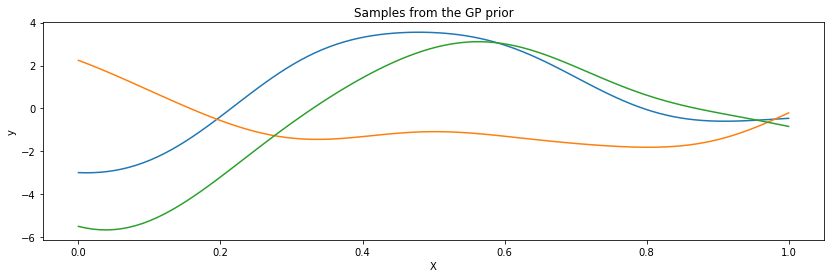

In [22]:
plt.figure(figsize=(14,4))
plt.plot(Xnew, pm.MvNormal.dist(mu=np.zeros(K.shape[0]), cov=K).random(size=3).T);
plt.title("Samples from the GP prior");
plt.ylabel("y");
plt.xlabel("X");

In [95]:
with pm.Model() as model:
    #gp = pm.gp.Marginal(cov_func=cov)
    η_trend = pm.HalfCauchy("η_trend", beta=2, testval=2.0)
    ℓ_trend = pm.Gamma("ℓ_trend", alpha=4, beta=0.1)
    cov_trend = η_trend**2 * pm.gp.cov.ExpQuad(1, ℓ_trend)
    gp = pm.gp.Marginal(cov_func=cov_trend)
    
    y_ = gp.marginal_likelihood("y", X=t, y=y, noise=cov_noise)
    
    mp = pm.find_MAP(include_transformed=True)

/home/felipematheus/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -61.209, ||grad|| = 0.084795: 100%|██████████| 17/17 [00:00<00:00, 592.65it/s]  


In [97]:
x_nova = x_nova.reshape(len(x_nova),1)

In [98]:
print("Predicting with gp ...")
mu, var = gp.predict(x_nova, point=mp, diag=True)
#mean_pred = mu*std_co2 + first_co2
#var_pred  = var*std_co2**2

# make dataframe to store fit results
fit = pd.DataFrame({"t": x_nova.flatten(),
                    "mu_total": mu,
                    "sd_total": np.sqrt(var)})#,
                   #index=dates)

print("Predicting with gp_trend ...")
mu, var = gp_trend.predict(t, point=mp,
                           given={"gp": gp, "X": t, "y": y, "noise": cov_noise},
                           diag=True)

#fit = pd.DataFrame({"t": x_nova.flatten(),
#                    "mu_total": mu,
#                    "sd_total": np.sqrt(var)})

Predicting with gp ...
Predicting with gp_trend ...


In [99]:
fit

,t,mu_total,sd_total
0,0.000000,5.770634,2.583583
1,1.341222,6.554274,2.392500
2,2.682444,7.322240,2.200130
3,4.023667,8.051812,2.012061
4,5.364889,8.719773,1.836157
5,6.706111,9.303484,1.682718
6,8.047333,9.782009,1.563730
7,9.388556,10.137223,1.490363
8,10.729778,10.354823,1.468766
9,12.071000,10.425177,1.496428


In [109]:
## plot the components
p = figure(title="SN_DES_SN013742 Filtro desg",
           x_axis_type='linear', plot_width=550, plot_height=350)
p.yaxis.axis_label = 'Fluxo'
p.xaxis.axis_label = 'Tempo (Dias)'

# plot mean and 2σ region of total prediction
upper = fit.mu_total + 1*fit.sd_total
lower = fit.mu_total - 1*fit.sd_total
band_x = np.append(fit.t.values, fit.t.values[::-1])
band_y = np.append(lower, upper[::-1])

# total fit
p.line(fit.t, fit.mu_total,
       line_width=1, line_color="firebrick", legend="Total fit")
p.patch(band_x, band_y,
        color="firebrick", alpha=0.6, line_color="white")

## trend
#p.line(fit.index, fit.mu_trend,
#       line_width=1, line_color="blue", legend="Long term trend")
#
## medium
#p.line(fit.index, fit.mu_medium,
#       line_width=1, line_color="green", legend="Medium range variation")
#
## seasonal
#p.line(fit.index, fit.mu_seasonal,
#       line_width=1, line_color="orange", legend="Seasonal process")
#
# true value
p.circle(x_conhecido_nova, y_nova,
         color="black", legend="Observed data")
#p.legend.location = "top_left"
show(p)

<ErrorbarContainer object of 3 artists>

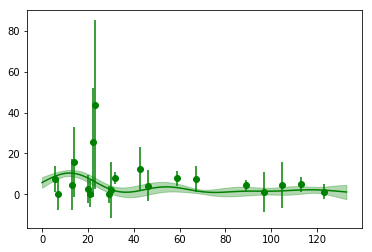

In [103]:
plt.fill_between(fit.t.values, fit.mu_total-fit.sd_total, fit.mu_total+fit.sd_total, alpha=.3, color='g')
plt.plot(fit.t.values, fit.mu_total, color='g')
plt.errorbar(x_conhecido_nova, y_nova , yerr=yerr_nova, fmt='o', color='g')

In [ ]:
y_nova = data_dict['desg'][:, 1]
yerr_nova = data_dict['desg'][:, 2]
x_conhecido_nova = data_dict['desg'][:, 0]

In [174]:
with pm.Model() as model:
    # yearly periodic component x long term trend
    η_per = pm.HalfCauchy("η_per", beta=2, testval=1.0)
    ℓ_pdecay = pm.Gamma("ℓ_pdecay", alpha=10, beta=0.075)
    period  = pm.Normal("period", mu=1, sd=0.05)
    ℓ_psmooth = pm.Gamma("ℓ_psmooth ", alpha=4, beta=3)
    cov_seasonal = η_per**2 * pm.gp.cov.Periodic(1, period, ℓ_psmooth) \
                            * pm.gp.cov.Matern52(1, ℓ_pdecay)
    gp_seasonal = pm.gp.Marginal(cov_func=cov_seasonal)

    # small/medium term irregularities
    η_med = pm.HalfCauchy("η_med", beta=0.5, testval=0.1)
    ℓ_med = pm.Gamma("ℓ_med", alpha=2, beta=0.75)
    α = pm.Gamma("α", alpha=5, beta=2)
    cov_medium = η_med**2 * pm.gp.cov.RatQuad(1, ℓ_med, α)
    gp_medium = pm.gp.Marginal(cov_func=cov_medium)

    # long term trend
    η_trend = pm.HalfCauchy("η_trend", beta=2, testval=2.0)
    ℓ_trend = pm.Gamma("ℓ_trend", alpha=4, beta=0.1)
    cov_trend = η_trend**2 * pm.gp.cov.ExpQuad(1, ℓ_trend)
    gp_trend = pm.gp.Marginal(cov_func=cov_trend)

    # noise model
    η_noise = pm.HalfNormal("η_noise", sd=0.5, testval=0.05)
    ℓ_noise = pm.Gamma("ℓ_noise", alpha=2, beta=4)
    σ  = pm.HalfNormal("σ",  sd=0.25, testval=0.05)
    cov_noise = η_noise**2 * pm.gp.cov.Matern32(1, ℓ_noise) +\
                pm.gp.cov.WhiteNoise(σ)

    # The Gaussian process is a sum of these three components
    gp = gp_seasonal + gp_medium + gp_trend

    # Since the normal noise model and the GP are conjugates, we use `Marginal` with the `.marginal_likelihood` method
    y_ = gp.marginal_likelihood("y", X=x_conhecido_nova.reshape(len(x_conhecido_nova),1), y=y_nova, noise=yerr_nova)

    # this line calls an optimizer to find the MAP
    mp = pm.find_MAP(include_transformed=True)



/home/felipematheus/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -62.618, ||grad|| = 0.045761: 100%|██████████| 275/275 [00:00<00:00, 314.68it/s] 


In [186]:
dates

DatetimeIndex(['1958-03-15', '1958-03-30', '1958-04-14', '1958-04-29',
               '1958-05-14', '1958-05-29', '1958-06-13', '1958-06-28',
               '1958-07-13', '1958-07-28',
               ...
               '2003-08-01', '2003-08-16', '2003-08-31', '2003-09-15',
               '2003-09-30', '2003-10-15', '2003-10-30', '2003-11-14',
               '2003-11-29', '2003-12-14'],
              dtype='datetime64[ns]', length=1115, freq='15D')

In [199]:
#y_nova 
y = data_dict['desg'][:, 1]
#yerr_nova 
cov_noise = data_dict['desg'][:, 2]
#x_conhecido_nova 
t = data_dict['desg'][:, 0]
t = t.reshape(len(t),1)

In [200]:
# predict at a 15 day granularity
#dates = pd.date_range(start='3/15/1958', end="12/15/2003", freq="15D")
tnew = x_nova.reshape(len(x_nova),1)#dates_to_idx(dates)[:,None]

print("Predicting with gp ...")
mu, var = gp.predict(tnew, point=mp, diag=True)
mean_pred = mu*std_co2 + first_co2
var_pred  = var*std_co2**2

# make dataframe to store fit results
fit = pd.DataFrame({"t": tnew.flatten(),
                    "mu_total": mean_pred,
                    "sd_total": np.sqrt(var_pred)})#,
                   #index=dates)

print("Predicting with gp_trend ...")
mu, var = gp_trend.predict(tnew, point=mp,
                           given={"gp": gp, "X": t, "y": y, "noise": cov_noise},
                           diag=True)
fit = fit.assign(mu_trend = mu*std_co2 + first_co2,
                 sd_trend = np.sqrt(var*std_co2**2))

print("Predicting with gp_medium ...")
mu, var = gp_medium.predict(tnew, point=mp,
                            given={"gp": gp, "X": t, "y": y, "noise": cov_noise},
                            diag=True)
fit = fit.assign(mu_medium = mu*std_co2 + first_co2,
                 sd_medium = np.sqrt(var*std_co2**2))

print("Predicting with gp_seasonal ...")
mu, var = gp_seasonal.predict(tnew, point=mp,
                              given={"gp": gp, "X": t, "y": y, "noise": cov_noise},
                              diag=True)
fit = fit.assign(mu_seasonal = mu*std_co2 + first_co2,
                 sd_seasonal = np.sqrt(var*std_co2**2))
print("Done")



Predicting with gp ...
Predicting with gp_trend ...
Predicting with gp_medium ...
Predicting with gp_seasonal ...
Done


In [197]:
len(mean_pred)

100

In [201]:
fit

,t,mu_total,sd_total,mu_trend,sd_trend,mu_medium,sd_medium,mu_seasonal,sd_seasonal
0,0.000000,424.711873,56.382644,315.69,3.598484e-37,315.689992,0.05493,424.711881,56.382629
1,1.211293,582.330616,40.748163,315.69,3.598484e-37,315.689995,0.05493,582.330621,40.748133
2,2.422586,527.843495,60.691496,315.69,3.598484e-37,315.690000,0.05493,527.843495,60.691473
3,3.633879,398.152593,57.159610,315.69,3.598484e-37,315.690005,0.05493,398.152588,57.159585
4,4.845172,409.607718,53.804858,315.69,3.598484e-37,315.690010,0.05493,409.607708,53.804835
5,6.056465,570.203025,40.327748,315.69,3.598484e-37,315.690018,0.05493,570.203007,40.327727
6,7.267758,541.347079,56.527416,315.69,3.598484e-37,315.690031,0.05493,541.347048,56.527399
7,8.479051,405.179230,56.194445,315.69,3.598484e-37,315.690049,0.05493,405.179181,56.194422
8,9.690343,396.543981,50.805321,315.69,3.598484e-37,315.690065,0.05493,396.543916,50.805305
9,10.901636,554.388046,41.204533,315.69,3.598484e-37,315.690064,0.05493,554.387982,41.204541


In [212]:
## plot the components
p = figure(title="Decomposition of the Mauna Loa Data",
           x_axis_type='datetime', plot_width=550, plot_height=350)
p.yaxis.axis_label = 'CO2 [ppm]'
p.xaxis.axis_label = 'Date'

# plot mean and 2σ region of total prediction
upper = fit.mu_total + 2*fit.sd_total
lower = fit.mu_total - 2*fit.sd_total
band_x = np.append(fit.index.values, fit.index.values[::-1])
band_y = np.append(lower, upper[::-1])

# total fit
p.line(fit.index, fit.mu_total,
       line_width=1, line_color="firebrick", legend="Total fit")
p.patch(band_x, band_y,
        color="firebrick", alpha=0.6, line_color="white")

## trend
#p.line(fit.index, fit.mu_trend,
#       line_width=1, line_color="blue", legend="Long term trend")
#
## medium
#p.line(fit.index, fit.mu_medium,
#       line_width=1, line_color="green", legend="Medium range variation")
#
## seasonal
#p.line(fit.index, fit.mu_seasonal,
#       line_width=1, line_color="orange", legend="Seasonal process")
#
# true value
p.circle(x_conhecido_nova, y_nova,
         color="black", legend="Observed data")
#p.legend.location = "top_left"
show(p)

In [213]:
x_conhecido_nova

array([  0.   ,   9.984,  11.976,  16.949,  29.984,  44.875,  52.863,
        53.863,  57.973,  67.008,  68.019,  69.062,  71.035,  84.043,
        96.988, 104.988, 111.863, 119.867])

In [214]:
y_nova

array([ 1.975 , 11.6   , 16.98  , 13.28  ,  1.037 ,  5.291 ,  3.503 ,
        8.488 ,  5.544 ,  1.803 ,  7.29  ,  0.3841,  0.5116,  4.512 ,
        1.244 ,  1.975 ,  8.321 ,  2.366 ])

In [ ]:
X, y = linear_training_data()
with pm.Model() as linear_model:
    weights = pm.Normal('weights', mu=0, sd=1)
    noise = pm.Gamma('noise', alpha=2, beta=1)
    y_observed = pm.Normal('y_observed',
                mu=X.dot(weights),
                sd=noise,
                observed=y)

    prior = pm.sample_prior_predictive()
    posterior = pm.sample()
    posterior_pred = pm.sample_posterior_predictive(posterior)

In [ ]:
with pm.Model() as gp_fit:
    p = pm.Gamma('p', 1, 1)
    n = pm.Gamma('n', 1, 1)
    k = n * pm.gp.cov.Matern32(1, p)